# 最佳平方逼近

我们上一次课重点介绍了最佳平方逼近. 关键性知识点有两个:
1. 用 Gram-Schmidt 过程产生标准正交基；
2. 用标准正交基产生目标函数在目标空间(有限维)的 Fourier 展开, 也即正交投影.
可以证明, 上述产生的目标投影是目标函数的最佳平方逼近(2-范数最佳逼近).

定义 5.13 的 Gram-Schmidt 过程是一个算法过程. 比如我们可以把 
$$
1, x, x^2, \cdots
$$
在 $[-1, 1]$ 上关于内积
$$
<f, g> = \int_{-1}^1 fg dx
$$
代入 Gram-Schmidt 过程, 这里 $\rho(x) \equiv 1$. 

In [1]:
import sympy as sym         # 调入符号计算库
from sympy import symbols   # 符号变量声明
from sympy.plotting import plot
x = symbols('x')            # x 是符号变量

In [2]:
N = 10   # 实际展开到了 10 次.
u = [x**i for i in range(N)]
v = list.copy(u)
u[0] = v[0] / sym.sqrt(sym.integrate(v[0] * v[0], (x, -1, 1)))
for i in range(1, N):
    v[i] = u[i]
    for k in range(i):
        v[i] = v[i] - sym.integrate(u[i]*u[k], (x, -1, 1)) * u[k]
    u[i] = v[i] / sym.sqrt(sym.integrate(v[i]*v[i], (x, -1, 1)))

上述代码严格重现了课本例 5.19. 我们可以用产生的 Legendre 多项式 `u` 来进一步验证课本的例 5.28:

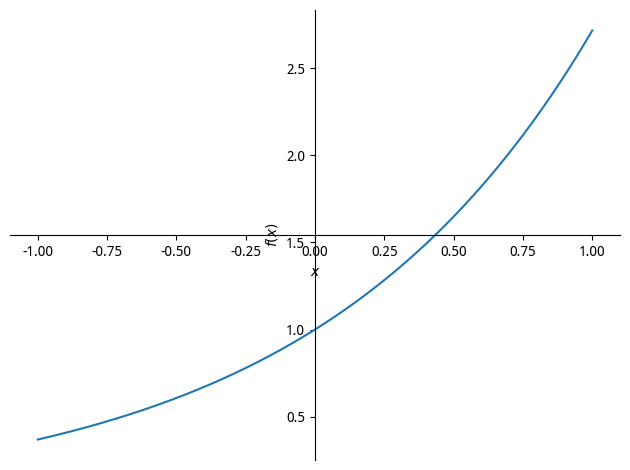

In [3]:
f = sym.exp(x)    # 目标函数
p1 = plot(f, (x, -1, 1))

In [4]:
m = 3   # 例 5.19 展开到了 3 次.
b = [i for i in range(m)]
hat_phi = 0 
for i in range(m):
    hat_phi = hat_phi + sym.integrate(f * u[i], (x, -1, 1)) * u[i]

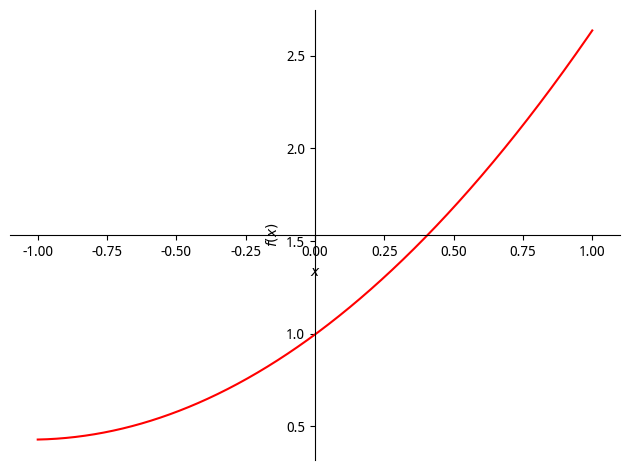

In [5]:
p2 = plot(hat_phi, (x, -1, 1), line_color='red')
p1.append(p2[0])

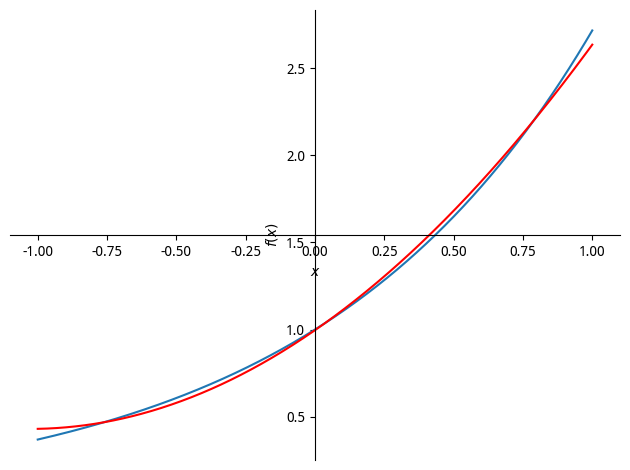

In [6]:
p1.show()

In [7]:
m = 6
b = [i for i in range(m)]
hat_phi = 0 
for i in range(m):
    hat_phi = hat_phi + sym.integrate(f * u[i], (x, -1, 1)) * u[i]

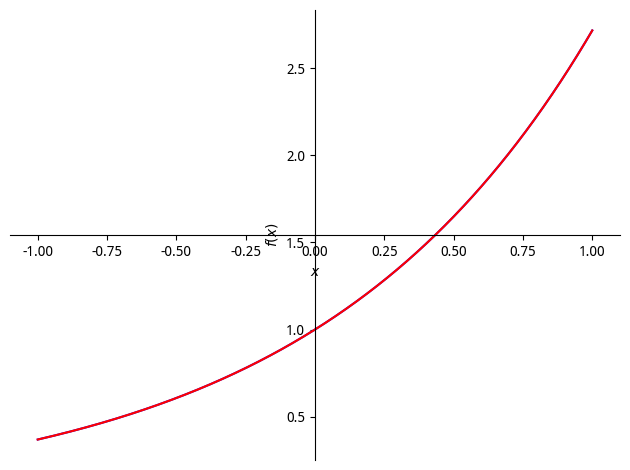

In [8]:
p1 = plot(f, (x, -1, 1), line_color='blue', show=False)
p2 = plot(hat_phi, (x, -1, 1), line_color='red', show=False)
p1.append(p2[0])
p1.show()

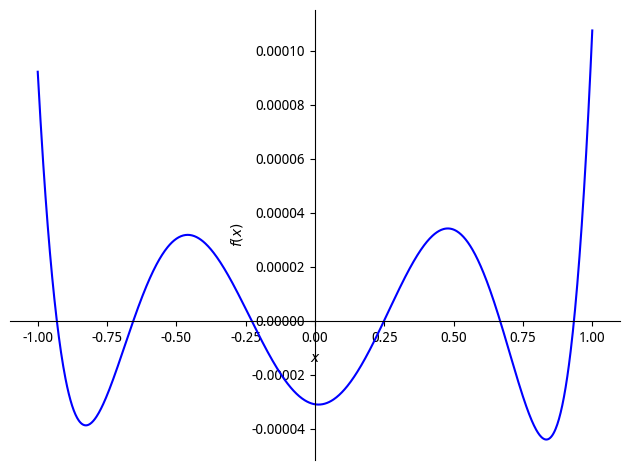

In [9]:
# 直接画误差
plot(f - hat_phi, (x, -1, 1), line_color='blue')

In [10]:
# 恢复 3 次以便和后面的例子做比较
m = 3
b = [i for i in range(m)]
hat_phi = 0 
for i in range(m):
    hat_phi = hat_phi + sym.integrate(f * u[i], (x, -1, 1)) * u[i]

## 正规方程组 (normal equations)

在上节课的基础上, 我们来考虑如何对一个一般的线性空间 
$$
V = \mbox{span}\{\phi_1, \phi_2, \cdots, \phi_n\}
$$
做最佳平方逼近. 当然我们可以直接先用 Gram-Schmidt 过程对其正交化, 但这样做对一个具体问题而言, 是代价极大的.

假设目标函数 $f$ 在 $V$ 中的最佳逼近元为
$$
\hat{\phi} = \sum_{i = 1}^n f_i \phi_i,
$$
这里 $f_i$ 是待定系数, $i = 1, 2, \cdots, n$.

那么对一个独立的基函数 $\phi_j$, $j = 1, 2, \cdots, n$, 有
$$
<\hat{\phi}, \phi_j> = \left<\sum_{i = 1}^n f_i \phi_i, \phi_j\right>
= \sum_{i = 1}^n <\phi_i, \phi_j> f_i.
$$

而 $f$ 作为空间外的一个元素, 它在空间内的各基函数的投影, 直观上看, 最佳也就是它自己在各基函数上的投影. 也就是说, 直观上也可以认为 (严格的结论就是定理 5.34)
$$
<\hat{\phi}, \phi_j> = <f, \phi_j>, i = 1, 2, \cdots, n.
$$
由此, 我们得到线性方程组

$$
\sum_{i = 1}^n <\phi_i, \phi_j> f_i = <f, \phi_j>, j = 1, 2, \cdots, n.
$$
写成矩阵形式就是
$$
G(\phi_1, \phi_2, \cdots, \phi_n) \vec{f} = \vec{c},
$$
其中 
$$
\vec{f} = (f_1, f_2, \cdots, f_n)^T,
$$
以及
$$
\vec{c} = (<f, \phi_1>, <f, \phi_2>, \cdots, <f, \phi_n>)^T
$$
所以该方程组又成为正规方程组, 它的系数矩阵就是正规矩阵.

例 5.35 就是用正规方程组, 直接在 
$$
\mbox{span}\{1, x, x^2\}
$$
内寻找 $f = e^x$ 的最佳逼近元, 我们演示如下:

In [11]:
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
m = 3
f = sym.exp(x)
G = zeros(m)
c = zeros(m, 1)
u = [x**i for i in range(m)]

In [12]:
for i in range(m):
    for j in range(m):
        G[i, j] = sym.integrate(u[i] * u[j], (x, -1, 1))
    c[i] = sym.integrate(f * u[i], (x, -1, 1))
fi = G.inv() * c

In [13]:
phi = 0
for i in range(m):
    phi = phi + fi[i] * u[i]

我们可以和书上结果对比一下:

In [14]:
G

Matrix([
[  2,   0, 2/3],
[  0, 2/3,   0],
[2/3,   0, 2/5]])

In [15]:
c

Matrix([
[  E - exp(-1)],
[    2*exp(-1)],
[E - 5*exp(-1)]])

In [16]:
fi

Matrix([
[  -3*E/4 + 33*exp(-1)/4],
[              3*exp(-1)],
[-105*exp(-1)/4 + 15*E/4]])

画图对比:

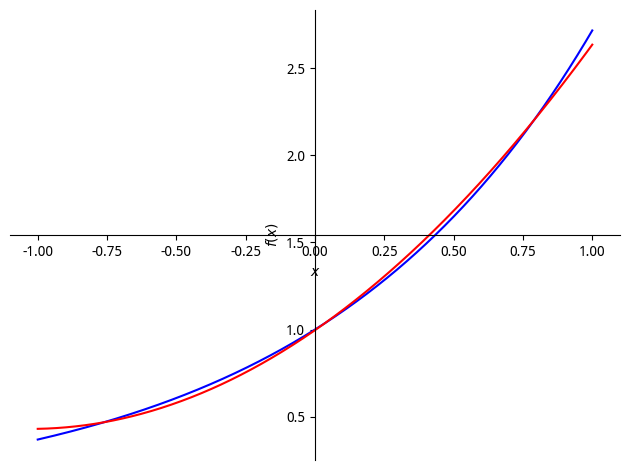

In [17]:
p1 = plot(f, (x, -1, 1), line_color='blue', show=False)
p2 = plot(phi, (x, -1, 1), line_color='red', show=False)
p1.append(p2[0])
p1.show()

我们可以比较一下正交展开和正规方程组结果的区别:

In [18]:
hat_phi - phi

-x**2*(-105*exp(-1)/4 + 15*E/4) + 3*sqrt(10)*(x**2 - 1/3)*(-7*sqrt(10)*exp(-1)/2 + sqrt(10)*E/2)/4 - 33*exp(-1)/4 + sqrt(2)*(-sqrt(2)*exp(-1)/2 + sqrt(2)*E/2)/2 + 3*E/4

有区别就离谱, 但这是未化简造成的:

In [19]:
sym.simplify(phi - hat_phi)

0

不难看到, 当基函数两两正交时, 正规方程组自然变为正交展开. 而且正规方程组本身的计算量是很大的, 同时还要考虑不好的基函数带来的条件数问题. 所以, 只建议在小规模, 临时的前提下使用.

## 离散最小二乘 (Discrete least squares, DLS)

离散最小二乘的直接动力来自数据拟合. 如果我们有一批在控制变量法下产生的数据, 现在我们需要对数据关于变量的规律做归纳或者验证, 比如例5.36那样, 验证一次或二次的规律. 那么这里就有一个必须考虑的问题, 也就是实际测量的数据总是有误差的. 于是我们就需要在接受总是有误差的这个前提基础上, 尽可能好地回归. 比如我们已经知道对匀加速直线运动, 位移是关于时间 $t$ 的二次函数. 但当我们真的把实测数据打印在纸上的时候, 这些数据不可能是恰好分布在一条二次曲线上的. 哪怕多次测量再取均值, 也无法消除这种测量误差带来的波动. 因此我们实际回归的, 是一条尽可能好的曲线.   

### 高斯函数和狄拉克函数 (Gaussian and Dirac delta functions)

**定义 5.37** 高斯函数定义如下:
$$
f(x) = a \exp \left(-\frac{(x - b)^2}{2c^2}\right),
$$
这里 $a, c \in \mathbb{R}^+$, $b \in \mathbb{R}$.

In [ ]:
def draw_gaussian(a, b, c):
    f = a * sym.exp(-(x - b)**2 / (2 * c**2))
    return plot(f)

In [ ]:
p1 = draw_gaussian(1, 0, 1)

In [ ]:
p2 = draw_gaussian(2, 0, 1)

In [ ]:
p1.append(p2[0])
p1.show()

可见 $a$ 是最大值. $b$ 是对称轴. 而 $c$ 是标准差(standard deviation), 或者 RMS (root mean square) 宽度. 

In [ ]:
p3 = draw_gaussian(1, 0, 2)

In [ ]:
p1.append(p3[0])
p1.show()

就是曲线有多胖. 当 $a = \frac{1}{\sqrt{2 \pi}}$, $b = 0$, $c = 1$ 是就是标准正态分布的概率密度函数: 

In [ ]:
draw_gaussian(1/sym.sqrt(2*sym.pi), 0, 1)

**引理 5.38** 高斯函数的积分满足:
$$
\int_{-\infty}^{\infty}a e^{-\frac{(x - b)^2}{2c^2}} dx = ac\sqrt{2\pi}.
$$
这个积分的计算无法只用初等变换, 而是需要极坐标变换.

In [ ]:
sym.integrate(sym.exp(-(x)**2 / (2)))

**定义 5.39** 正态分布或者高斯分布, 就是把高斯函数归一化(以满足分布函数要求):
$$
f_{\mu, \sigma} = \frac{1}{\sigma\sqrt{2 \pi}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right),
$$
这里 $\mu$ 是期望, $\sigma$ 是标准差 ($\sigma^2$ 是方差).

**定义 5.40** Dirac-delta 函数 
$$
\delta(x - \bar{x}) := \lim_{\epsilon \to 0} \phi_{\epsilon}(x - \bar{x}).
$$
这里
$$
\phi_\epsilon(x - \bar{x}) := f_{\bar{x}, \epsilon}
$$
是期望为 $\bar{x}$, 标准差为 $\epsilon$ 的正态分布. 

**引理 5.41** Dirac-delta 函数满足:
$$
\delta(x - \bar{x}) = \left\{
\begin{array}{ll}
+\infty, & x = \bar{x}, \\
0, & x \neq \bar{x}.
\end{array}
\right.
$$
以及
$$
\int_{-\infty}^{\infty} \delta(x - \bar{x}) dx = 1.
$$
直接对定义取极限就可以了.

Dirac-delta 函数物理上刻画了一个点(零测度)源的提供有限输出, 比如一个滴水滴到湖面, 一个脉冲, 等等. 

**引理 5.42** 如果 $f : \mathbb{R} \to \mathbb{R}$ 是连续映射, 则
$$
\int_{-\infty}^{\infty}\delta(x - \bar{x}) f(x) dx = f(\bar{x}).
$$
注意这里证明过程中的 (\*), 实际采用了 Dirac-delta 函数的另一种定义:
$$
\phi_\epsilon(x) = \left\{
\begin{array}{ll}
\frac{1}{\epsilon^2}(x + \epsilon), & x \in [-\epsilon, 0] \\
-\frac{1}{\epsilon^2}(x - \epsilon), & x \in [0, \epsilon] \\
0, & \mbox{其他}.
\end{array}
\right.
$$

**定义 5.43** Heaviside 函数或者阶梯函数的定义如下:
$$
H(x) = \left\{
\begin{array}{ll}
0, & \mbox{若} x < 0,\\
1, & \mbox{若} x \geq 0.
\end{array}
\right.
$$
它也是我们学过的 $0$ 次截断指数函数
$$
H(x) = x_+^0.
$$

**引理 5.44** Dirac-delta 函数和 Heaviside 函数有如下关系:
$$
\int_{-\infty}^x \delta(t) dt = H(x).
$$
积分有没有越过 $0$ 点能量为 $1$ 的脉冲.

### 形式重构 (Reusing the formalism)

这里作者又浪了. 我真不知道怎么翻译比较好. 因为 formalism 的直接含义是形式主义. 大家看着办吧. 

**定义 5.45** 定义函数 $\lambda : \mathbb{R} \to \mathbb{R}$, 
$$
\lambda(t) = \left\{
\begin{array}{ll}
0, & t \in [-\infty, a), \\
\int_a^t \rho(\tau) d\tau, &t \in [a, b],\\
\int_a^b \rho(\tau) d\tau, &t \in (b, +\infty].\\
\end{array}
\right.
$$

这个定义下, $\lambda$ 在 $[a, b]$ 区间有个变化的值, 在 $t < a$ 和 $t > b$ 都是不变的. 这就意味着一个微元 $d\lambda$ (课本上用的是连续的测度 $d\lambda$)
$$
d\lambda = \left\{
\begin{array}{ll}
\rho(t)dt, & t \in [a, b]\\
0, & \mbox{其他}.
\end{array}
\right.
$$
或者说微元 $d\lambda$ 的支撑是 $[a, b]$.

**定义 5.46** 我们将连续测度概念推广一下, 将 $d\lambda$ 的支撑设成离散点集 $\{t_1, t_2, \cdots, t_N\}$, 且在上面对应取值 $\rho(t_i) = \rho_i$, 那么这样的连续测度称为 Dirac 测度. 也就是只有在越过这些离散点时, 会发生跳跃的变化. 所以大家现在体会一下啥叫 "Reusing the formalism", 包括 Dirac-delta 函数这种, 往往都是联系连续和离散的一种形式工具. 我们这里可能更容易联想的是, 用这种手段, 我们可以在形式上统一连续分布函数和离散分布函数.

**引理 5.47** 对函数 $u : \mathbb{R} \to \mathbb{R}$, 令
$$
\lambda(t) = \sum_{i = 1}^N \rho_i H(t - t_i),
$$
则有
$$
\int_{-\infty}^{\infty} u(t) dt = \sum_{i = 1}^N \rho_i u(t_i).
$$
连续积分和离散求和直接相等. 连续和离散直接对应. 用这种形式, 我们也可以把离散分布和连续分布的累积分布函数的形式统一. 而这里我们真正的动机是, 测量得到的数值都是离散的, 因为我们只能做有限次瞬时的测量. 所以哪怕我们回归的规律是连续的函数比如 $u(t)$ 或 $v(t)$, 但我们得到的测量数据永远只有 $u(t_i)$ 和 $v(t_i)$, $i = 1, 2, \cdots, N$. 但是在形式上, 我们可以在形式上接受:
$$
<u(t), v(t)> = \sum_{i = 1}^N \rho(t_i) u(t_i) v(t_i).
$$
由此把离散最小二乘统一到最佳平方逼近的框架下.

### 基于正规方程组的离散最小二乘

**例 5.48** 看过程. 导入数据:

In [ ]:
import numpy as np   # 现在是数值计算了哦.
from matplotlib import pyplot as plt
x = np.arange(12) + 1
y = np.array([256, 201, 159, 61, 77, 40, 17, 25, 103, 156, 222, 345])

先画一下, 什么鬼...

In [ ]:
plt.plot(x, y, 'o')

我们先验地知道, 这是一个二次函数. 所以我们希望将 $x$ 和 $y$ 的规律回归成
$$
y = a_0 + a_1 x + a_2 x^2.
$$
基于这些数据, 我们能做到最好就是选取待定系数 $a_0$, $a_1$ 和 $a_2$ 满足
$$
(a_0, a_1, a_2) = \mbox{argmin}_{a_0, a_1, a_2} \sum_{i = 1}^{12} \left(y_i - \sum_{j = 0}^2 a_j x^j\right)^2.
$$
这里我们可以用经典优化手段做, 或者, 在上一节的指导下, 直接采用正规方程组: 

In [ ]:
x0 = x**0   
x1 = x**1
x2 = x**2
xj = np.array([x0, x1, x2])
xj

In [ ]:
G = np.dot(xj, xj.transpose())
G    # 和课本对比

In [ ]:
c0 = np.dot(y, x0.transpose())
c1 = np.dot(y, x1.transpose())
c2 = np.dot(y, x2.transpose())
c = np.array([c0, c1, c2])
c    # 和课本对比

In [ ]:
# 解正规方程组 G a = c
a = np.linalg.linalg.solve(G, c)
a

画图对比一下:

In [ ]:
# 看得懂我在干啥么? 
xh = np.linspace(1, 12, 100)
yh = np.dot(a,np.array([xh**0, xh**1, xh**2]))
plt.plot(x, y, 'o', xh, yh, 'r')

这种离散最小二乘的正规方程组, 还有一种代数的解释. 这里 $x$ 和 $y$ 是我们测量得到的数据, 有 $12$ 对, 但是我们的待定系数只有 $a_0$, $a_1$, $a_2$ 三个. 于是我们直接带入
$$
y = a_0 + a_1 x + a_2 x^2
$$
得到的 
$$
X a = y
$$
是一个行数远大于列数的超定方程组, 一般是无解的. 但对于这种情况, 我们可以采取求广义逆. 也就是方程两边同乘以 $X^T$, 得到
$$
X^TX a = X^Ty.
$$
这是一个方阵, 可以求解. 同时. 你发现你得到的线性方程组, 恰好就是正规方程组. 这里
$$
(X^TX)^{-1}X^T
$$
称为广义逆(的一种), 而
$$
a = (X^TX)^{-1}X^T * y.
$$

### 通过 QR 分解的离散最小二乘

大家肯定会关心, 那个基于正交系的最佳平方逼近能用在这种离散形式下么? 自然是可以的. 

**定义 5.49** 矩阵 $A \in \mathbb{R}^{n \times n}$ 是正交的, 如果
$$
A^TA = I.
$$

**定义 5.50** 矩阵 $A \in \mathbb{R}^{n \times n}$ 是上三角的, 如果
$$
\forall i>j, a_{ij} = 0.
$$
对称可定义下三角矩阵.

**定理 5.51** (QR 分解) 对于任何矩阵 $A \in \mathbb{R}^{m\times n}$, 存在正交阵 $Q \in \mathbb{R}^{m\times m}$ 和上三角阵 $R \in \mathbb{R}^{m \times n}$, 满足
$$
A = Q R.
$$

In [ ]:
X = xj.transpose()
q0 = X[:,0]
q0 = q0 / np.sqrt(np.dot(q0.transpose(), q0))
q1 = X[:,1]
q1 = q1 - np.dot(q1.transpose(), q0)*q0 
q1 = q1 / np.sqrt(np.dot(q1.transpose(), q1))
q2 = X[:, 2]
q2 = q2 - np.dot(q2.transpose(), q0)*q0 - np.dot(q2.transpose(), q1)*q1
q2 = q2 / np.sqrt(np.dot(q2.transpose(), q2))
Q = np.array([q0, q1, q2]).transpose()
np.dot(Q.transpose(), Q)

我们这里从实际计算的角度, 只是对 $X$ 的列向量做了 Gram-Schmidt 正交化, 相当于
$$
X = Q R, 
$$
其中 $Q$ 满足 $Q^TQ = I$, 而不满足 $Q Q^T = I$, 仍然是一个长方阵. 但是原方程
$$
X a = y
$$
即
$$
Q R a = y,
$$
两边同乘以 $Q^T$, 得
$$
R a = Q^Ty.
$$

In [ ]:
R = np.dot(Q.transpose(), X)
R

In [ ]:
qy = np.dot(Q.transpose(), y)
qy

In [ ]:
np.linalg.linalg.solve(R, qy)

咋一看, 似乎只是改了一种解法, 但注意到原本的正规方程组的系数矩阵, 几乎是一个 Vandermonde 矩阵, 条件数非常恶劣, 也就是说, 只要次数稍微高一点, 误差就会很大. 而正交化后的矩阵, 条件数会有极大改善. 这里大家在做编程作业时, 再仔细考虑一下.